In [2]:
import numpy as np
import pandas as pd

try:
    import matplotlib.pyplot as plt
except: 
    %pip install matplotlib.pyplot
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except: 
    %pip install seaborn
    import seaborn as sns

try:
    import plotly.express as px
except: 
    %pip install plotly.express
    import plotly.express as px

try:
    from IPython.display import display, Latex, Markdown
except: 
    %pip install display
    %pip install Latex
    %pip install Markdown
    from IPython.display import display, Latex, Markdown

try:
    import ipywidgets as widgets
except: 
    %pip install ipywidgets
    import ipywidgets as widgets

try:
    import geopandas
except: 
    %pip install geopandas
    import geopandas

try: 
    from ipywidgets import interact, interactive, fixed, interact_manual
except:
    %pip install ipywidgets, interact, interactive, fixed, interact_manual
    from ipywidgets import interact, interactive, fixed, interact_manual

from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline


try:
    import geopy
except: 
    %pip install geopy
    import geopy

try:
    import pycountry
except: 
    %pip install pycountry
    import pycountry

try:
    import re
except:
    %pip install re
    import re




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------------- -------------------- 3.1/6.3 MB 17.1 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 17.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
stockData = pd.read_json("all_stock_exchanges_complete.json").copy()
stockData.head()
exchangeCoordinatesData = pd.read_json("stock_exchanges_coordinates.json").copy()
exchangeCoordinatesData.head()

,Exchange Name,Country,Code,Latitude,Longitude
0,US OTC,United States,OTC,38.9072° N,77.0369° W
1,Bombay Stock Exchange,India,BOM,18.9291° N,72.9959° E
2,Tokyo Stock Exchange,Japan,TYO,35.6824° N,139.7713° E
3,Nasdaq Stock Market,United States,NASDAQ,40.7570° N,73.9819° W
4,London Stock Exchange,United Kingdom,LON,51.5145° N,0.0922° W


In [ ]:
#Merge DataFrame stockData and exchangeCoordinatesData 
#Cleaned the DataFrame by renaming the columns and dropping the unnecessary columns
mergedStockExchangeData = stockData.merge(exchangeCoordinatesData, on="Exchange Name")
mergedStockExchangeData.rename(columns={"Country_x" : "Country", "Code_x" : "Code"}, inplace=True)
mergedStockExchangeData.drop(columns=["Country_y", "Code_y"], inplace=True)
mergedStockExchangeData.head()

,Exchange Name,Country,Code,Currency,Number of Stocks,Latitude,Longitude
0,US OTC,United States,OTC,USD,7582,38.9072° N,77.0369° W
1,Bombay Stock Exchange,India,BOM,INR,4253,18.9291° N,72.9959° E
2,Tokyo Stock Exchange,Japan,TYO,JPY,3894,35.6824° N,139.7713° E
3,Nasdaq Stock Market,United States,NASDAQ,USD,3316,40.7570° N,73.9819° W
4,London Stock Exchange,United Kingdom,LON,GBP,3298,51.5145° N,0.0922° W


In [41]:
mergedStockExchangeData[["Country", "Number of Stocks"]].groupby("Country").sum()


,Number of Stocks
Country,
Argentina,74
Australia,1791
Austria,127
Bahrain,23
Bangladesh,353
...,...
United States,13074
Venezuela,18
Vietnam,633


TypeError: only length-1 arrays can be converted to Python scalars

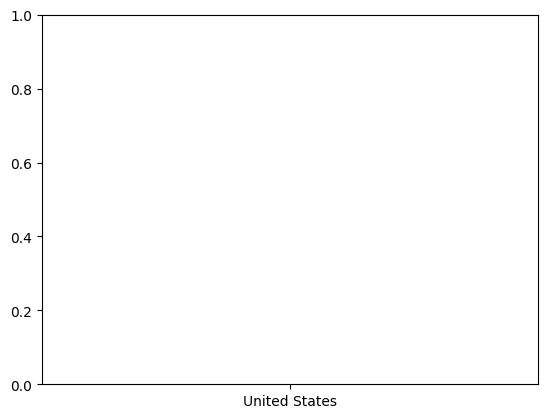

In [39]:
#Bar Graph of Number of Stocks per Exchange
counts = mergedStockExchangeData[["Country", "Number of Stocks"]].groupby("Country").sum()
plt.bar(mergedStockExchangeData['Country'], counts, color = "skyblue", edgecolor = "black", width = 5)
plt.xlabel("Exchange Name")
plt.ylabel("Number of Stocks")
plt.title("Number of Stocks per Exchange")
